In [1]:
import pandas as pd
from keras.datasets import mnist
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data  = pd.read_csv('C:/Users/jatin/Downloads/TrainingData.csv')

In [7]:
data

,CID,Bitstream,class
0,293436,1110101100001100011010101011111111101000110111...,0
1,233249,1100111110000110111110100011111101111100110100...,0
2,32011,1010001000000111000010000001100100011010011110...,0
3,113131,0111001010111101010001011110010001011000000010...,1
4,297144,0100010101101101111000100111101100111110001110...,1
...,...,...,...
249995,104893,0001110100010000111010001100110000110110011101...,1
249996,6836,0001010100111001111100001110111011010000100000...,0
249997,117349,1001011110111001010011100001001011101100110000...,1
249998,157158,1110101001011101100101011101110101001000001100...,1


In [8]:
def list_data(data):
  l = []
  for i in range(0, len(data), 8):
    l.append(int(data[i:i+8], 2))
  return l

data['binary'] = data['Bitstream'].apply(list_data)

In [9]:
data

,CID,Bitstream,class,binary
0,293436,1110101100001100011010101011111111101000110111...,0,"[235, 12, 106, 191, 232, 222, 150, 28]"
1,233249,1100111110000110111110100011111101111100110100...,0,"[207, 134, 250, 63, 124, 209, 227, 70]"
2,32011,1010001000000111000010000001100100011010011110...,0,"[162, 7, 8, 25, 26, 123, 65, 213]"
3,113131,0111001010111101010001011110010001011000000010...,1,"[114, 189, 69, 228, 88, 11, 44, 223]"
4,297144,0100010101101101111000100111101100111110001110...,1,"[69, 109, 226, 123, 62, 56, 226, 52]"
...,...,...,...,...
249995,104893,0001110100010000111010001100110000110110011101...,1,"[29, 16, 232, 204, 54, 116, 240, 6]"
249996,6836,0001010100111001111100001110111011010000100000...,0,"[21, 57, 240, 238, 208, 129, 127, 74]"
249997,117349,1001011110111001010011100001001011101100110000...,1,"[151, 185, 78, 18, 236, 195, 193, 106]"
249998,157158,1110101001011101100101011101110101001000001100...,1,"[234, 93, 149, 221, 72, 49, 85, 4]"


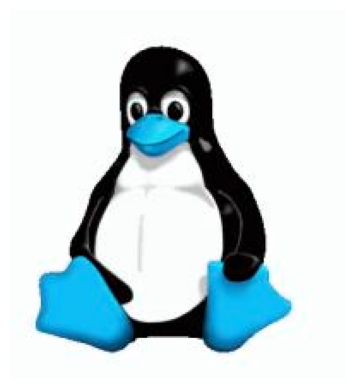

(128, 128)


In [11]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

image = cv2.imread('C:/Users/jatin/Downloads/post697_1.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_width = 128
new_height = 128

# Resize the image
resized_image = cv2.resize(gray_image, (new_width, new_height))

plt.imshow(image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

print(resized_image.shape)

In [12]:
main_X = data[:5000]

In [13]:
main_X['class'].value_counts()

0    2523
1    2477
Name: class, dtype: int64

In [14]:
y = main_X['class']

In [15]:
def xor_image(resized_image, data):
  x = 0
  k =  np.copy(resized_image)

  for i in range(len(resized_image)):
    for j in range(len(resized_image)):
      if x == 8:
        x = 0
      k[i][j] = (k[i][j] ^ data[x])
      x = x + 1
  return k

In [16]:
new_xor_images = []

for bin in main_X['binary']:
  new_xor_images.append(xor_image(resized_image, bin))

new_xor_images = np.array(new_xor_images)
print(new_xor_images.shape)

(5000, 128, 128)


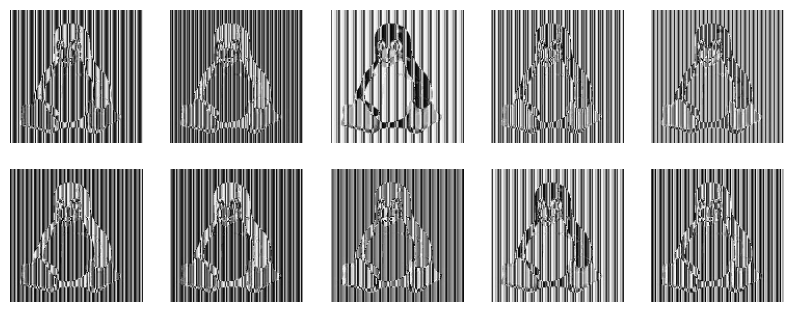

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


In [18]:

plt.figure(figsize=(10, 10))

for i in range(10):
    # Create a subplot for each digit
    plt.subplot(5, 5, i + 1)

    # Display the image
    image = new_xor_images[i]
    plt.imshow(image, cmap='gray')

    # Hide the axes
    plt.axis('off')

plt.show()
print(list(y[:10]))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_xor_images, y, test_size=0.05, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4750, 128, 128), (250, 128, 128), (4750,), (250,))

In [21]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 128, 128, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], 128, 128, 1))


In [22]:
X_train_reshaped.shape, X_test_reshaped.shape, y_train.shape, y_test.shape

((4750, 128, 128, 1), (250, 128, 128, 1), (4750,), (250,))

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and 'same' padding
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
model.fit(X_train_reshaped, y_train, epochs = 25, batch_size = 5000, validation_data = [X_test_reshaped, y_test])

Epoch 1/25


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
      app.start()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jatin\AppData\Local\Temp\ipykernel_12476\3952802706.py", line 1, in <module>
      model.fit(X_train_reshaped, y_train, epochs = 25, batch_size = 5000, validation_data = [X_test_reshaped, y_test])
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\jatin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
OOM when allocating tensor with shape[4750,128,128,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1586]

In [ ]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# X_train_reshaped = []

# for data in X_train:
#   X_train_reshaped.append(np.array(data).reshape(1, -1).flatten())

# X_train_reshaped = np.array(X_train_reshaped)